# 커피지수

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [6]:
result_dir = '/content/content/MyDrive/video/삼성멀티캠퍼스빅데이터기반지능형서비스개발/210906_cartogram1/CoffeeIndex'
cf = pd.read_csv(f'{result_dir}/커피지수.csv')
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,가평,9,2,0,1,0.200000
1,강릉,32,10,0,2,0.294118
2,강진,1,0,0,0,0.000000
3,거제,9,6,0,0,0.666667
4,거창,1,0,0,1,0.000000


In [7]:
data_folder = '/content/content/MyDrive/video/삼성멀티캠퍼스빅데이터기반지능형서비스개발/210906_cartogram1/'
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')

In [8]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [9]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [10]:
!cp $data_folder/draw_map.py .
!ls -l

total 16
drwx------ 6 root root 4096 Sep  7 07:52 content
-rw------- 1 root root 5323 Sep  7 08:00 draw_map.py
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data


In [11]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

In [12]:
df = pd.merge(map, cf, how='left')
print(df.shape)
df.head()

(250, 8)


,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,4.0,0.0,0.0,0.0,0.000000
1,0,8,화천,2.0,0.0,0.0,1.0,0.000000
2,0,9,양구,2.0,0.0,0.0,0.0,0.000000
3,0,10,고성(강원),NaN,NaN,NaN,NaN,NaN
4,1,3,양주,17.0,7.0,0.0,1.0,0.388889


In [13]:
df.fillna(0, inplace=True)
df['이디야'] = df.이디야.astype(int)
df['스타벅스'] = df.스타벅스.astype(int)
df['커피빈'] = df.커피빈.astype(int)
df['빽다방'] = df.빽다방.astype(int)
df.head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,4,0,0,0,0.000000
1,0,8,화천,2,0,0,1,0.000000
2,0,9,양구,2,0,0,0,0.000000
3,0,10,고성(강원),0,0,0,0,0.000000
4,1,3,양주,17,7,0,1,0.388889


## 커피지수

In [14]:
# 커피지수 Top 10 지역
df.sort_values(by='커피지수', ascending=False).head(10)

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
66,7,7,서울 강남,30,79,47,10,3.150000
186,17,12,부산 해운대,10,33,4,2,3.083333
65,7,6,서울 서초,19,42,26,6,2.720000
33,4,6,서울 종로,14,31,13,4,2.444444
44,5,6,서울 중구,18,43,8,5,2.217391
203,19,6,함안,1,0,2,0,2.000000
196,18,10,부산 동구,3,5,1,0,2.000000
6,1,5,연천,1,0,2,0,2.000000
76,8,7,성남 분당,17,45,7,12,1.793103
151,14,10,대구 수성,10,21,2,3,1.769231


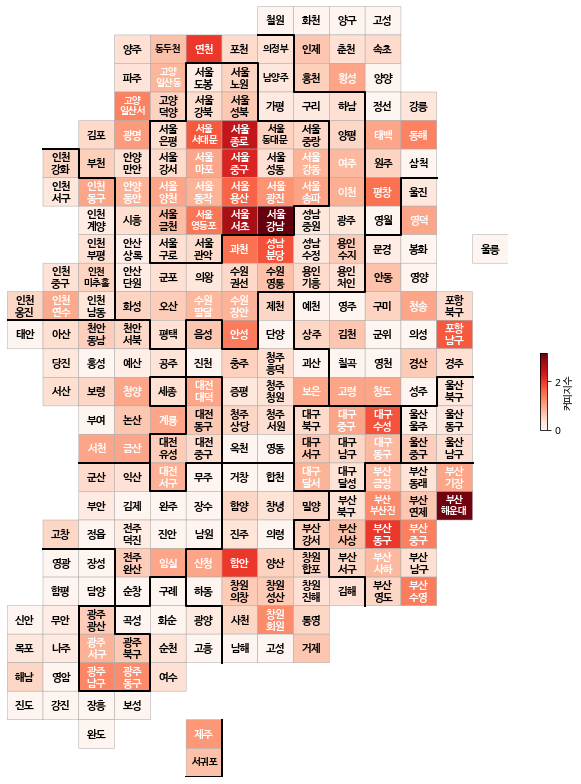

In [15]:
drawKorea('커피지수', df, 'Reds')

In [16]:
# 스타벅스 Top 5 지역
df.sort_values(by='스타벅스', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
66,7,7,서울 강남,30,79,47,10,3.150000
76,8,7,성남 분당,17,45,7,12,1.793103
44,5,6,서울 중구,18,43,8,5,2.217391
65,7,6,서울 서초,19,42,26,6,2.720000
186,17,12,부산 해운대,10,33,4,2,3.083333


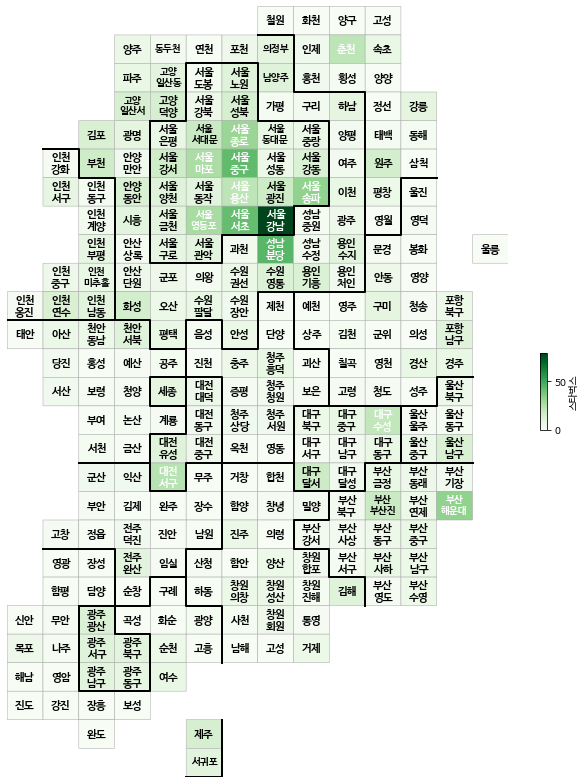

In [17]:
drawKorea('스타벅스', df, 'Greens')

In [18]:
# 커피빈 Top 5 지역
df.sort_values(by='커피빈', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
66,7,7,서울 강남,30,79,47,10,3.150000
65,7,6,서울 서초,19,42,26,6,2.720000
33,4,6,서울 종로,14,31,13,4,2.444444
64,7,5,서울 영등포,21,28,10,5,1.461538
43,5,5,서울 마포,29,27,8,7,0.972222


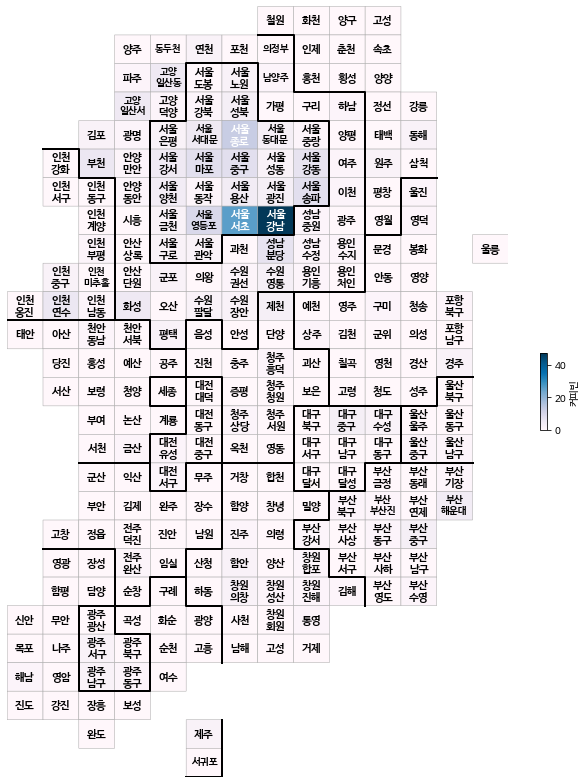

In [19]:
drawKorea('커피빈', df, 'PuBu')

In [20]:
# 이디야 Top 5 지역
df.sort_values(by='이디야', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
10,1,9,춘천,54,22,0,2,0.392857
16,2,7,남양주,44,12,1,5,0.265306
42,5,4,서울 강서,41,17,5,10,0.431373
28,3,11,강릉,32,10,0,2,0.294118
217,20,9,김해,32,12,1,3,0.371429


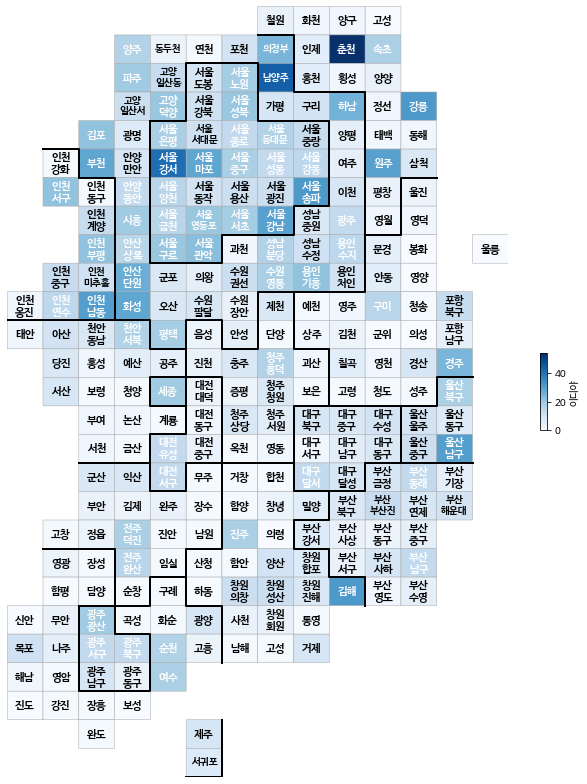

In [21]:
drawKorea('이디야', df, 'Blues')

In [22]:
# 빽다방 Top 5 지역
df.sort_values(by='빽다방', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
167,16,4,대전 서구,14,24,1,14,0.892857
29,4,2,김포,22,14,2,13,0.457143
76,8,7,성남 분당,17,45,7,12,1.793103
40,5,2,부천,29,17,6,11,0.575000
50,6,1,인천 서구,22,9,0,11,0.272727


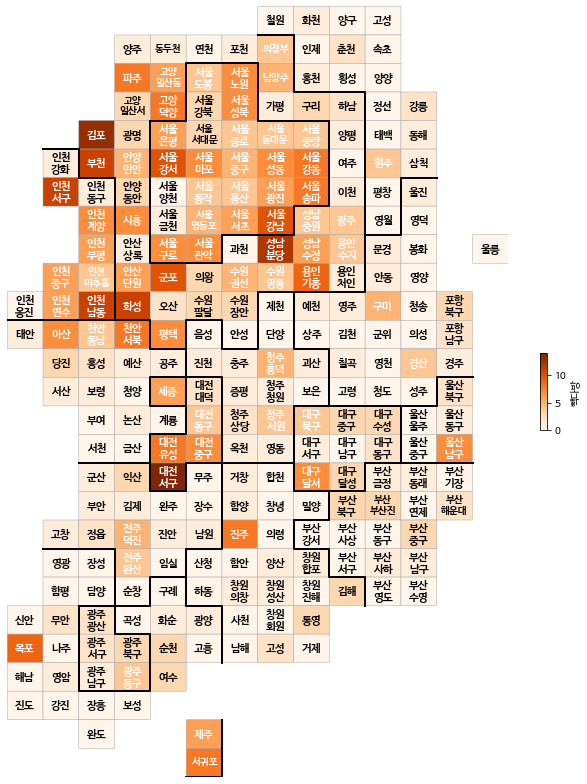

In [23]:
drawKorea('빽다방', df, 'Oranges')